# <center> 👉 class_10_6 CV » _HOG / CNN Face Detection_ </center>

## Face detection with dlib (HOG and CNN)  

In the first part of this tutorial, you’ll discover dlib’s two face detection functions, 
- one for a HOG + Linear SVM face detector and   
- another for the MMOD CNN face detector.
We'll then implement two Python scripts:
- **hog_face_detection: Applies dlib’s HOG + Linear SVM face detector.**  
- **cnn_face_detection: Utilizes dlib’s MMOD CNN face detector.**  
We'll then run these face detectors on a set of images and examine the results, noting when to use each face detector in a given situation.  

## ▶ HOG Face Detection  

HOG Face Detector    
- **get_frontal_face_detector()** : Pre-trained HOG detectors  

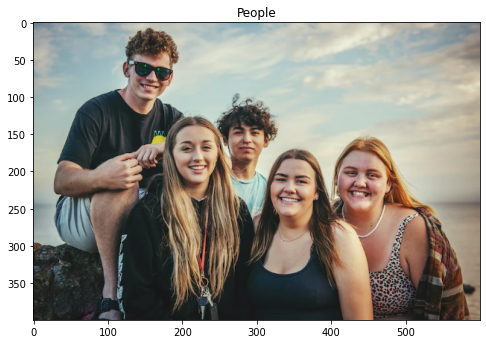

In [2]:
import cv2
import matplotlib.pylab as plt

image = cv2.imread('./images/CV/people2.webp')
image_resized = cv2.resize(image, (600, 400))
# image_resized.shape
img = cv2.cvtColor(image_resized, cv2.COLOR_BGR2RGB) 

plt.figure(figsize=(8, 8))
plt.imshow(img),plt.axis('on'),plt.title('People')
plt.show()

In [3]:
import dlib # kernel python

In [4]:
hog_face_detector = dlib.get_frontal_face_detector()
face_detections = hog_face_detector(image_resized, 1) # scale parameter (bigger, less face detect)

In [5]:
face_detections

rectangles[[(190, 149) (252, 211)], [(411, 184) (474, 246)], [(315, 198) (377, 260)], [(262, 136) (314, 188)]]

rectangles[[(190, 149) (252, 211)], [(411, 184) (474, 246)], [(315, 198) (377, 260)], [(262, 136) (314, 188)]]

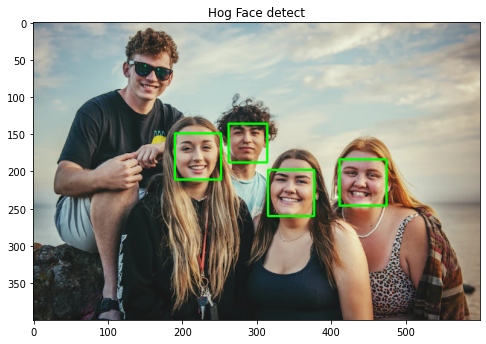

In [7]:
for face_detection in face_detections:
    left, top, right, bottom = face_detection.left(), face_detection.top(), face_detection.right(), face_detection.bottom()
    cv2.rectangle(image_resized, (left, top), (right, bottom), (0, 255, 0), 2)
    
cv2.imshow('Hog Face detect', image_resized)
cv2.waitKey(0)
cv2.destroyAllWindows() 

img = cv2.cvtColor(image_resized, cv2.COLOR_BGR2RGB) 

plt.figure(figsize=(8, 8))
plt.imshow(img),plt.axis('on'),plt.title('Hog Face detect')
plt.show()

In [ ]:
## ▶ Face Detection with CNNs  

CNNs performs better compared to HOGs.   
We call **cnn_face_detection_model_v1()** in dlib.   
>- parameter : 'mmod_human_face_detector.dat' 
>- https://github.com/davisking/dlib-models    

In [8]:
cnn_face_detector = dlib.cnn_face_detection_model_v1('./cv_data/mmod_human_face_detector.dat')

In [11]:
from time import time

start = time()

image = cv2.imread('./images/CV/people2.webp')
image_resized = cv2.resize(image, (600, 400)) 
face_detections = cnn_face_detector(image_resized, 1) 

# c is the confidence indicating the reliability of a single detection.
for idx, face_detection in enumerate(face_detections):
    left, top, right, bottom, confidence = face_detection.rect.left(), face_detection.rect.top(), face_detection.rect.right(), face_detection.rect.bottom(), face_detection.confidence
    print(f'confidence{idx+1}: {confidence}')  # print confidence of the detection
    cv2.rectangle(image_resized, (left, top), (right, bottom), (0, 255, 0), 2)

end = time()    
print('run_time =',end-start)    
cv2.imshow('CNN Face Detection',image_resized)
cv2.waitKey(0)
cv2.destroyAllWindows() 


confidence1: 1.1531041860580444
confidence2: 1.0825945138931274
confidence3: 1.082515835762024
confidence4: 1.080208420753479
confidence5: 1.0619131326675415
run_time = 16.512776374816895


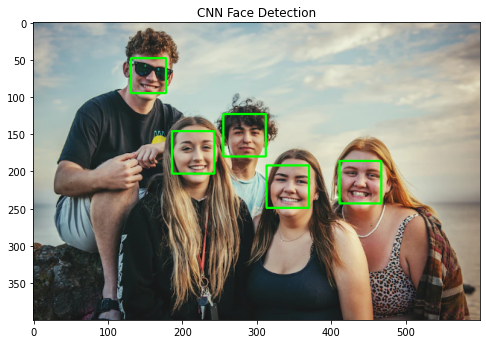

In [13]:
img = cv2.cvtColor(image_resized, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(8, 8))
plt.imshow(img),plt.axis('on'),plt.title('CNN Face Detection')
plt.show()

In [20]:
# Ex 2
image2 = cv2.imread('./Images/CV/people6.webp')
image2.shape

(333, 521, 3)

In [22]:
image2_resized = cv2.resize(image2, (700, 500))
face_detections = cnn_face_detector(image2_resized, 1)

for idx, face_detection in enumerate(face_detections):
    left, top, right, bottom, confidence = face_detection.rect.left(), face_detection.rect.top(), face_detection.rect.right(), face_detection.rect.bottom(), face_detection.confidence
    print(f'confidence{idx+1}: {confidence}') 
    cv2.rectangle(image2_resized, (left, top), (right, bottom), (0, 255, 0), 2)

cv2.imshow('CNN Face Detection',image2_resized)
cv2.waitKey(0)
cv2.destroyAllWindows() 

confidence1: 1.1134754419326782
confidence2: 1.1042011976242065
confidence3: 1.1031848192214966
confidence4: 1.0890014171600342
confidence5: 1.080521583557129


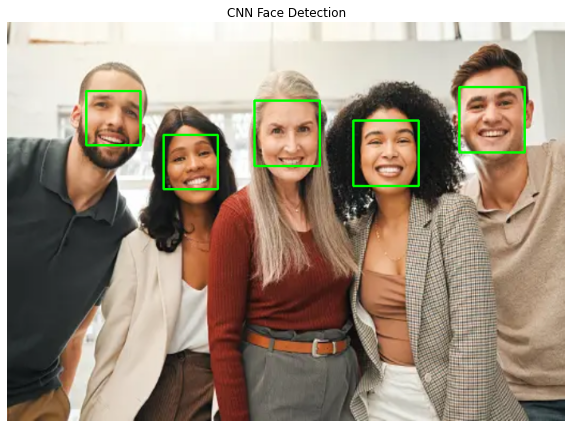

In [24]:
from matplotlib import pyplot as plt

plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(image2_resized, cv2.COLOR_BGR2RGB)),plt.axis('off'),plt.title('CNN Face Detection')
plt.show()

In [27]:
# Ex 3

from matplotlib import pyplot as plt
import cv2

image2 = cv2.imread('./Images/CV/people10.webp')
image2.shape

(776, 600, 3)

confidence1: 1.122855544090271
confidence2: 1.1078757047653198
confidence3: 1.085274338722229
confidence4: 1.0852657556533813
confidence5: 0.8529623746871948


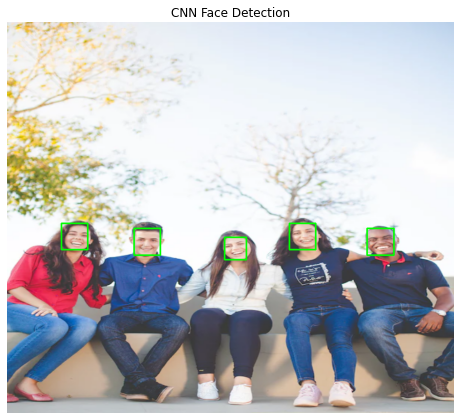

In [28]:
image2_resized = cv2.resize(image2, (800, 700))
face_detections = cnn_face_detector(image2_resized, 1)

for idx, face_detection in enumerate(face_detections):
    left, top, right, bottom, confidence = face_detection.rect.left(), face_detection.rect.top(), face_detection.rect.right(), face_detection.rect.bottom(), face_detection.confidence
    print(f'confidence{idx+1}: {confidence}') 
    cv2.rectangle(image2_resized, (left, top), (right, bottom), (0, 255, 0), 2)  
    

plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(image2_resized, cv2.COLOR_BGR2RGB)),plt.axis('off'),plt.title('CNN Face Detection')
plt.show()    